# The objective is to classify activities into one of the six activities performed

Description of experiment The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

For each record in the dataset the following is provided:

Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.

Triaxial Angular velocity from the gyroscope.

A 561-feature vector with time and frequency domain variables.

Its activity label.

An identifier of the subject who carried out the experiment.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read csv
train_df=pd.read_csv("/Users/antonio/Desktop/daticodice/datamovimentosmart/train.csv",sep=',',header=0)
test_df=pd.read_csv("/Users/antonio/Desktop/daticodice/datamovimentosmart/test.csv",sep=',',header=0)

In [5]:
train_df.shape


(7352, 563)

In [6]:
test_df.shape

(2947, 563)

In [7]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


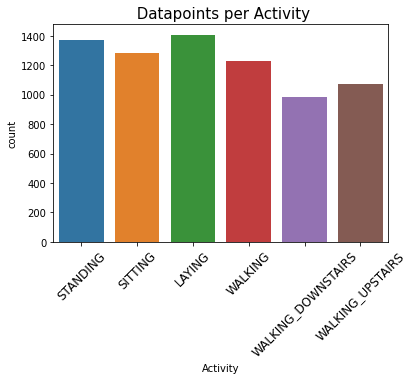

In [8]:
plt.title(' Datapoints per Activity', fontsize=15)
sns.countplot(train_df.Activity)
plt.xticks(rotation=45,fontsize=12)
plt.show()

Almost same distribution so that is not imbalanced



In [9]:
# number of activity
train_df.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [10]:
# % of activity
(train_df.Activity.value_counts()/7352)*100

LAYING                19.137650
STANDING              18.688792
SITTING               17.491839
WALKING               16.675734
WALKING_UPSTAIRS      14.594668
WALKING_DOWNSTAIRS    13.411317
Name: Activity, dtype: float64

In [11]:
sum(train_df.duplicated())

0

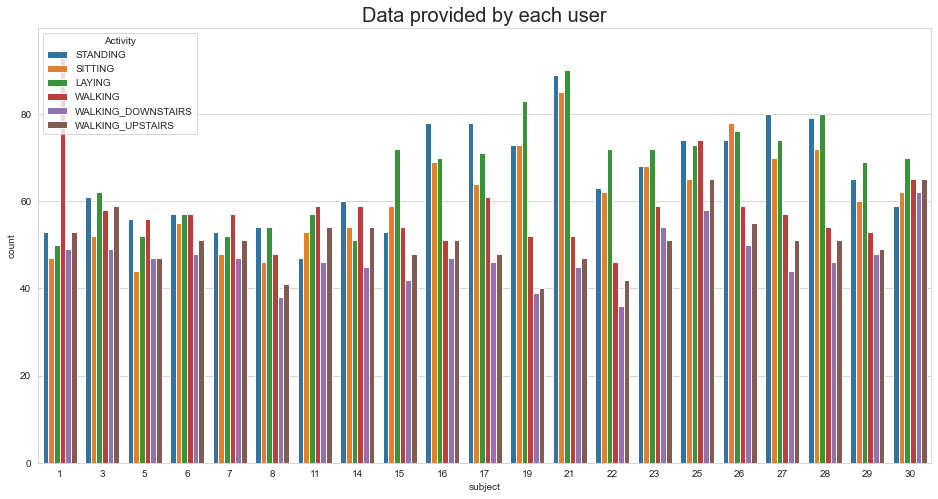

In [12]:
#Checking for data imbalance
sns.set_style('whitegrid')
#plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = train_df)
plt.show()

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [14]:
train_df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [15]:
print("df train set missing values:", train_df.isna().sum().sum())

df train set missing values: 0


In [16]:
print("df test set missing values:", test_df.isna().sum().sum())

df test set missing values: 0


In [17]:
columns = train_df.columns

# Removing '()','-'and',' from feature name names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train_df.columns = columns
#test.columns = columns

In [18]:
columns = test_df.columns

# Removing '()','-'and',' from feature name names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

test_df.columns = columns
#test.columns = columns

<BarContainer object of 3 artists>

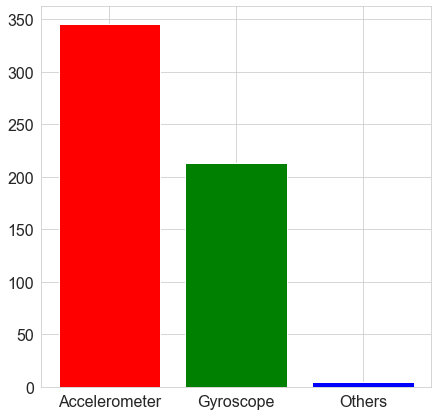

In [19]:
acc = 0 
gyro = 0 
oth = 0 
for column in train_df.columns:
    if 'Acc' in str(column):
      acc += 1
    elif 'Gyro' in str(column):
      gyro += 1
    else :
      oth+=1
      
plt.rcParams.update({'figure.figsize':[7,7],'font.size':16})
plt.bar(['Accelerometer','Gyroscope','Others'],[acc,gyro,oth],color=('r','g','b'))

# Magnitude of an acceleration can saperate it well

Exploratory Data Analysis Based on the common nature of activities we can broadly put them in two categories.

Static and dynamic activities :

SITTING, STANDING, LAYING can be considered as static activities with no motion involved
WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS can be considered as dynamic activities with significant amount of motion involved

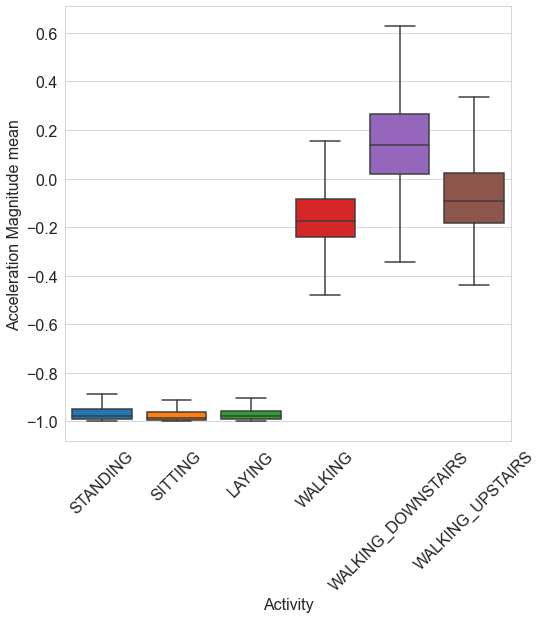

In [20]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=train_df, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
#plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
#plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=45)
plt.show()

Observations:

If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.

If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.

If tAccMean > 0.0 then the Activity is WalkingDownstairs.

# Splitting data

In [21]:
y_train = train_df['Activity'].copy()
X_train = train_df.drop(['Activity'], axis=1).copy()

y_test = test_df['Activity'].copy()
X_test = test_df.drop(['Activity'], axis=1).copy()

In [22]:
# classes in Activity
num_classes=6

Encoding labels and scaling data

In [23]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [24]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training models

In [25]:
import tensorflow as tf

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [26]:
tf.random.set_random_seed(1)

Our architecture this time will have 562 neurons in input layer, 64 neurons in 2 hidden layer and 6 in the output layer.
We will also changing the activation function to ReLu and will be using adam optimizer.
Our model will look like this -

In [27]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))#shape[1] is columns
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 562)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                36032     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
Total params: 40,582
Trainable params: 40,582
Non-trainable params: 0
_________________________________________________________________


Here thing to note is the Total parameters and trainable parameters.
Total params = 40.582 which is divided in the form of (562 x 64) + 64+ 4160+390.
(562*64) for the fully connected structure because  each of the 562 neurons in the input layer will be connected to two  hidden Dense layers  and 4_ Dense Layer will be connect to every neuron in the output layer i.e.6.
+ 6 for the biases which is added to the output layer.

fit() function trains the model for a fixed number of epochs (iterations on a dataset).
It returns a history object. Its History.history attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

Before training a model, we need to configure the learning process, which is done via the compile method.

Compile Method receives three arguments:

— An optimizer. This could be the string identifier of an existing optimizer.
— A loss function. This is the objective that the model will try to minimize.
— A list of metrics. For any classification problem you will want to set this to metrics=[‘accuracy’].

In [29]:
batch_size = 32 
# is a hyperparameter that defines the number of samples to work 
#through before updating the internal model parameters.
epochs = 25
#denotes number of times the learning algorithm will work through the training dataset.

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit( X_train, 
                    y_train,
                    validation_split=0.2, 
                    batch_size=batch_size,
                    epochs=epochs, callbacks=[
        tf.keras.callbacks.ModelCheckpoint('./model.h5', save_best_only=True),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.1,
            patience=1
        )
    ]
)

Train on 5881 samples, validate on 1471 samples
Epoch 1/25
5881/5881 [==============================] - 1s 150us/step - loss: 0.6652 - acc: 0.7456 - val_loss: 0.3140 - val_acc: 0.9075
Epoch 2/25
5881/5881 [==============================] - 0s 54us/step - loss: 0.2632 - acc: 0.9029 - val_loss: 0.3390 - val_acc: 0.8668
Epoch 3/25
5881/5881 [==============================] - 0s 65us/step - loss: 0.1822 - acc: 0.9393 - val_loss: 0.1870 - val_acc: 0.9334
Epoch 4/25
5881/5881 [==============================] - 0s 60us/step - loss: 0.1702 - acc: 0.9398 - val_loss: 0.1829 - val_acc: 0.9320
Epoch 5/25
5881/5881 [==============================] - 0s 57us/step - loss: 0.1629 - acc: 0.9463 - val_loss: 0.1803 - val_acc: 0.9347
Epoch 6/25
5881/5881 [==============================] - 0s 63us/step - loss: 0.1550 - acc: 0.9486 - val_loss: 0.1779 - val_acc: 0.9341
Epoch 7/25
5881/5881 [==============================] - 0s 63us/step - loss: 0.1481 - acc: 0.9509 - val_loss: 0.1744 - val_acc: 0.9334
Epoch 

Usually with every epoch increasing, loss goes lower and accuracy goes higher. But with val_loss and val_acc, many cases can be possible:

val_loss starts increasing, val_acc starts decreasing(means model is cramming values not learning)

val_loss starts increasing, val_acc also increases.(could be case of overfitting or diverse probability values in cases softmax is used in output layer)

val_loss starts decreasing, val_acc starts increasing(Correct, means model build is learning and working fine)

Only the loss function is used to update your model's parameters, the accuracy is only used for you to see how well your model is doing.

You should seek to minimize your loss and maximize your accuracy. Ideally the difference between your validation data results and your training data results should be similar (allthough some difference are expected)

The lower the loss, the better a model (unless the model has over-fitted to the training data). The loss is calculated on training and validation and its interperation is how well the model is doing for these two sets. Unlike accuracy, loss is not a percentage. It is a summation of the errors made for each example in training or validation sets.

Results

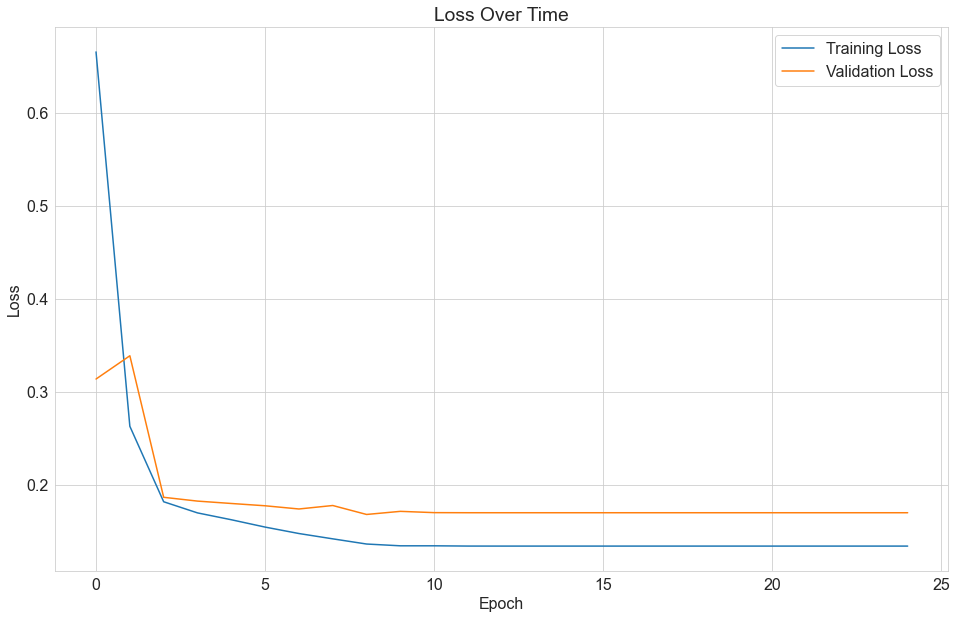

In [30]:
plt.figure(figsize=(16, 10))

epochs_range = range(epochs)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(
    epochs_range,
    train_loss,
    label="Training Loss"
)

plt.plot(
    epochs_range,
    val_loss,
    label="Validation Loss"
)

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()
plt.title("Loss Over Time")


plt.show()

In [31]:
model.evaluate(X_test, y_test)

2947/2947 [==============================] - 0s 43us/step


[0.21885244767009343, 0.9110960298811009]

In [32]:
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model=LogisticRegression(max_iter=800)

model.fit(X_train,y_train)
y_pred=model.predict(X_test)

lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using Logistic Regression : ", lr_accuracy)

Accuracy using Logistic Regression :  0.9552086868001357


In [33]:
#report for logistic regression
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       537
           1       0.97      0.87      0.92       491
           2       0.89      0.97      0.93       532
           3       0.94      0.99      0.97       496
           4       0.99      0.96      0.97       420
           5       0.97      0.94      0.95       471

    accuracy                           0.96      2947
   macro avg       0.96      0.95      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [34]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_accuracy=accuracy_score(y_test, rf.predict(X_test))
print("Random Forest accuracy is %2.2f" % accuracy_score(y_test, rf.predict(X_test)))

Random Forest accuracy is 0.93


In [35]:
#report for random forest
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.90      0.89      0.90       491
           2       0.90      0.91      0.91       532
           3       0.90      0.97      0.93       496
           4       0.96      0.85      0.90       420
           5       0.90      0.92      0.91       471

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.93      0.93      2947



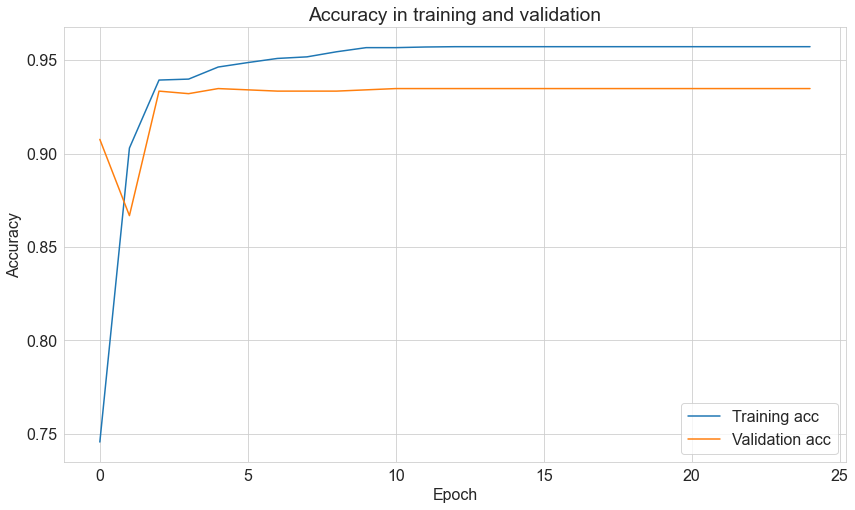

In [36]:

plt.figure(figsize=(14, 8))

epochs_range = range(epochs)
train_acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(
    epochs_range,
    train_acc,
    label="Training acc"
)

plt.plot(
    epochs_range,
    val_acc,
    label="Validation acc"
)

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title("Accuracy in training and validation")

plt.show()

In [37]:
ss=y_test
zz=model.predict(X_test)

d = {'true_y': ss, 'predicted_y': zz}
d1 = pd.DataFrame(data=d)

In [39]:
d1.shape

(2947, 2)